# Rekurencyjne Odwracanie Mcierzy

## Analiza algorytmu

### Pseudokod rekurencyjnego algorytmu odwracania macierzy

```python
def inverse(A: Matrix) -> Matrix:

    n = size(A)     # rozmiar macierzy A

    # Warunek brzegowy - trywialna odwrotnoś
    if n == 1:
        return 1 / A

    # Podział macierzy A na bloki o jednakowym rozmiarze
    [A11 A12]
    [A21 A22] = A

    # Zmienne pomocnicze
    A11_inv = inverse(A11)
    S22 = A22 - A21 * A11_inv * A12
    S22_inv = inverse(S22)

    # Oblicznie bloków składających się na macierz wynikową B
    B11 = A11_inv + A11_inv * A12 * S22_inv * A21 * A11_inv
    B12 = -A11_inv * A12 * S22_inv
    B21 = -S22_inv * A21 * A11_inv
    B22 = S22_inv

    # Składanie obliczonych bloków w wynikową macierz B
    B = [B11, B12]
        [B21, B22]

    return B
```

### Pseudokod algorytmu rekurencyjnego mnożenia macierzy
```python
def multiply_strassen_with_classic(A: Matrix, B: Matrix, l: int = 6) -> Matrix:

    def strassen(A: Matrix, B: Matrix, n: int):

        # Warunek brzegowy - trywialne mnożenie
        if n == 1:
            return A * B

        # Warunek brzegowy - rozmiar macierzy suboptymalny aby wywoływać rekurencyjnie
        elif n <= l:
            return multiply_classic(A, B)
        
        # Podział macierzy A na bloki o jednakowym rozmiarze
        [A11 A12]
        [A21 A22] = A

        # Podział macierzy B na bloki o jednakowym rozmiarze
        [B11 B12]
        [B21 B22] = B

        # Wywołania rekurencyjne aby wyliczy macierze pomocnicze P_i, i z {1, 2, ..., 7}
        P1 = strassen(A11 + A22, B11 + B22, n // 2)
        P2 = strassen(A21 + A22, B11, n // 2)
        P3 = strassen(A11, B12 - B22, n // 2)
        P4 = strassen(A22, B21 - B11, n // 2)
        P5 = strassen(A11 + A12, B22, n // 2)
        P6 = strassen(A21 - A11, B11 + B12, n // 2)
        P7 = strassen(A12 - A22, B21 + B22, n // 2)

        # Składanie macierzy wynikowej C z bloków powstałych z P_i
        C11 = P1 + P4 - P5 + P7
        C12 = P3 + P5
        C21 = P2 + P4
        C22 = P1 - P2 + P3 + P6

        C = [C11, C12]
            [C21, C22]

        return C
    
    return strassen(A, B, size(A))
```

### FLO: liczba operacji zmiennoprzecinkowych w algorytmie

In [1]:
# Funkcja anonimowa obliczająca liczbę operacji dla k
flo = lambda k: pow(2, k) + sum([pow(2, k - i) * (46 * pow(7, i - 1) + pow(4, i - 1) - 36 * pow(2, i - 1) + 1) for i in range(2, k + 1)])
flo_mul = lambda k: 2*8^k

## Eksperymenty

### Przygotowanie danych

In [2]:
from inverse import inverse
from utils import *
from timeit import default_timer as timer

import matplotlib.pyplot as plt

MAX_K = 8
SEED = 420
REPS = 15
MATRICES_FILE_PATH = f"matrices_k{MAX_K}_s{SEED}.dat"

In [3]:
matrices = generate_data(reps=15, max_k=MAX_K, seed=SEED, path=MATRICES_FILE_PATH, verbose=True)

Matrices 2x2 are ready
Matrices 4x4 are ready
Matrices 8x8 are ready
Matrices 16x16 are ready
Matrices 32x32 are ready
Matrices 64x64 are ready
Matrices 128x128 are ready
Matrices 256x256 are ready


In [12]:
sizes = np.array(list(map(lambda ms: ms[0].shape[0], matrices)))
times = np.array(list(map(lambda set: list(map(lambda m: measure_exec_time(inverse, m), set)), matrices)))
flos = np.array(list(map(lambda n: flo(int(np.log2(n))), sizes)))

In [13]:
times.shape

(8, 15)

In [18]:
times_mean = np.mean(times, axis=1)
times_std = np.std(times, axis=1)

In [26]:
times_std

array([2.29599412e-04, 5.88970552e-05, 1.24949393e-04, 3.78153494e-04,
       9.71306557e-05, 8.73639644e-04, 6.52405168e-03, 4.20307413e-01])

### Wykresy

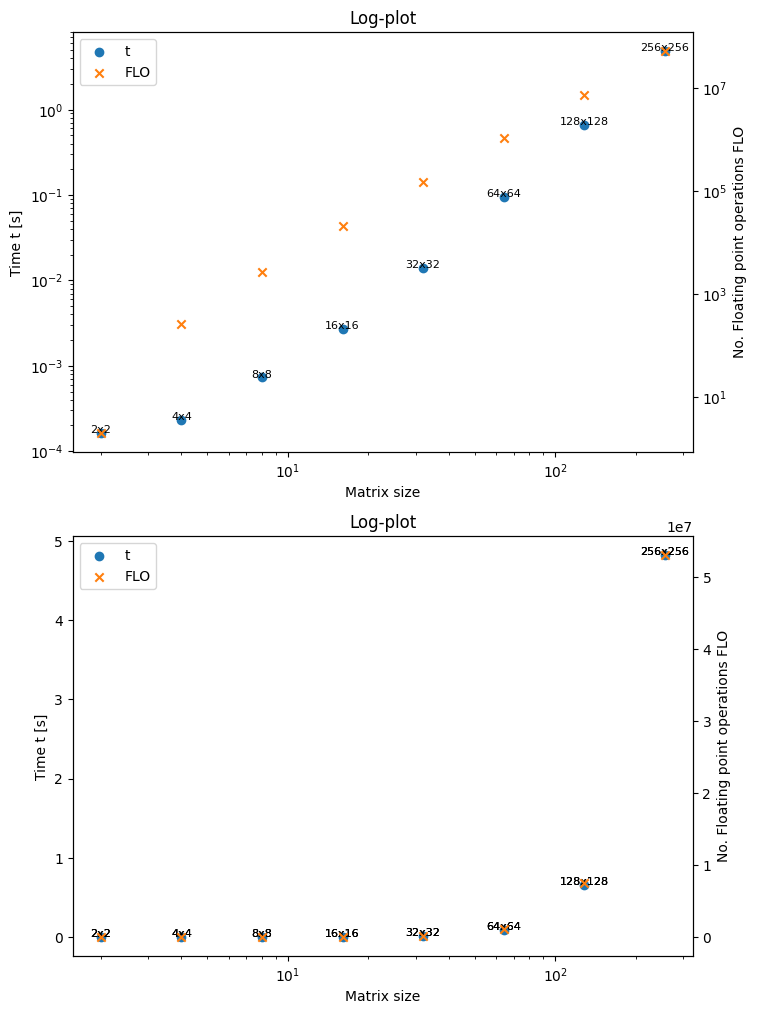

In [43]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(8, 12)

# Log-plot
ax1_flo = ax1.twinx()
ax1.scatter(sizes, times_mean, color='tab:blue', label="t")
ax1_flo.scatter(sizes, flos, color='tab:orange', label="FLO", marker='x')
ax1.set_ylabel("Time t [s]")
ax1_flo.set_ylabel("No. Floating point operations FLO")
ax1.set_xlabel("Matrix size")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1_flo.set_yscale('log')

for i, size in enumerate(list(sizes)):
    ax1.annotate(f"{size}x{size}", (sizes[i], times_mean[i]), fontsize=8, ha='center')
    ax2.annotate(f"{size}x{size}", (sizes[i], times_mean[i]), fontsize=8, ha='center')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_flo.get_legend_handles_labels()
ax1_flo.legend(lines + lines2, labels + labels2, loc='upper left')
ax1.set_title("Log-plot")

# Normal-plot
ax2_flo = ax2.twinx()
ax2.scatter(sizes, times_mean, color='tab:blue', label="t")
ax2_flo.scatter(sizes, flos, color='tab:orange', label="FLO", marker='x')
ax2.set_ylabel("Time t [s]")
ax2_flo.set_ylabel("No. Floating point operations FLO")
ax2.set_xlabel("Matrix size")
ax2.set_xscale('log')

for i, size in enumerate(list(sizes)):
    ax2.annotate(f"{size}x{size}", (sizes[i], times_mean[i]), fontsize=8, ha='center')
    ax2.annotate(f"{size}x{size}", (sizes[i], times_mean[i]), fontsize=8, ha='center')

lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_flo.get_legend_handles_labels()
ax2_flo.legend(lines + lines2, labels + labels2, loc='upper left')
ax2.set_title("Log-plot")


plt.show()